In [8]:
import shap
import numpy as np
import pandas as pd
from shap.datasets import iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [9]:
X, y = iris(display=True)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
y = pd.Series(y)

In [12]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Length: 150, dtype: str

In [15]:
#splitting of data

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2,stratify= y)
print("Shape of Training data: ",x_train.shape)
print("Shape of Testing data: ",x_test.shape)

Shape of Training data:  (120, 4)
Shape of Testing data:  (30, 4)


In [16]:
#distribution of target in train and test

y_train.value_counts(normalize=True) 

setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: proportion, dtype: float64

In [17]:
#encoding the target 

le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [18]:
y_test

array([1, 0, 0, 0, 2, 1, 1, 1, 2, 0, 2, 2, 1, 2, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 2, 2, 2, 0, 2, 2])

In [28]:
# fit model on data

rf = RandomForestClassifier(random_state=42, max_depth=3, n_estimators=7)
rf.fit(x_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",7
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_tr

In [29]:
#prediction on data

y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

In [30]:
#accuracy score 

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.95
0.9333333333333333


Here the model is Overfitting so we'll change the max_depth & n_estimators of the Random Forest model. 

In [31]:
#make a Explainer

explainer = shap.TreeExplainer(model = rf, data = x_train, model_output="probability")


In [33]:
#base Value

explainer.expected_value

array([0.34714286, 0.31856628, 0.33429086])

In [ ]:
#calculate base values manually

rf.predict_proba(x_train).mean(axis=0)

array([0.33095238, 0.33289425, 0.33615337])

There is a difference in the base values calculated by the Explainer and when we are calculating manually. This is because the treee explainer by default chunks out only 100 values at a time in order to give prediction. But if we use iloc, we can make em same. 

In [37]:
explainer = shap.TreeExplainer(model = rf, data = x_train.iloc[0:51,:], model_output="probability")

print(rf.predict_proba(x_train.iloc[0:51,:]).mean(axis=0))
print(rf.predict_proba(x_train.iloc[0:51,:]).mean(axis=0))

[0.31372549 0.32046996 0.36580455]
[0.31372549 0.32046996 0.36580455]


In [38]:
explainer = shap.TreeExplainer(model = rf, data = x_train, model_output="probability")


In [47]:
#calculation of shapley values

shap_values = explainer(x_test)
shap_values

.values =
array([[[-0.02142857,  0.04540138, -0.02397281],
        [-0.00357143, -0.00482612,  0.00839755],
        [-0.17214286,  0.33787241, -0.16572954],
        [-0.15000001,  0.24244365, -0.09244364]],

       [[-0.02142857,  0.02277569, -0.00134712],
        [ 0.09214286, -0.08936434, -0.00277852],
        [ 0.30357144, -0.11047699, -0.19309445],
        [ 0.27857144, -0.14194022, -0.13663122]],

       [[ 0.04857143, -0.09402705,  0.04545562],
        [-0.00142857,  0.00192486, -0.00049629],
        [ 0.32714287, -0.13044431, -0.19669856],
        [ 0.27857144, -0.09645936, -0.18211208]],

       [[ 0.04857143, -0.04303731, -0.00553411],
        [-0.00142857,  0.00192486, -0.00049629],
        [ 0.32714287, -0.14642938, -0.1807135 ],
        [ 0.27857144, -0.13146403, -0.14710741]],

       [[-0.02166667,  0.00896643,  0.01270024],
        [-0.00166667, -0.00216519,  0.00383186],
        [-0.17380953, -0.20805393,  0.38186346],
        [-0.15000001, -0.11775317,  0.26775318]],



In [44]:
shap_values = explainer(x_test.iloc[0:1,:])


In [46]:
shap_values.shape

(1, 4, 3)

1 - no. of input rows
4 - no. of input features
3 - no. of classes

In [48]:
shap_values.shape

(30, 4, 3)

In [49]:
#waterfall plotting

shap_values[0,:,0]

.values =
array([-0.02142857, -0.00357143, -0.17214286, -0.15000001])

.base_values =
np.float64(0.3471428571428571)

.data =
array([5.5, 2.5, 4. , 1.3])

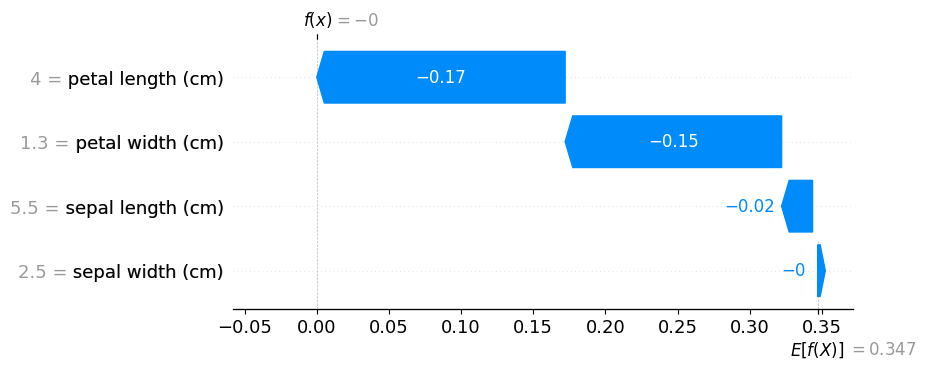

In [50]:
shap.waterfall_plot(shap_values[0,:,0])